## Installing and setting connection

In [2]:
print("Installation of the module MySQL Connector/python")
!pip install mysql-connector-python

Installation of the module MySQL Connector/python


In [5]:
## import MySQL Connector/Python module
import mysql.connector as connector
from mysql.connector.pooling import MySQLConnectionPool

In [9]:
## Create connection
print("MySQL Connection and Database creation is setting up...")
try:
    connection = connector.connect(
    user="root",
    password=""
    )
    print("Done...")
except Exception as e:
    print("Username or password is incorrect")
    print(f"Error no {e.errno}")
    print(f"Error Message {e.msg}")


MySQL Connection and Database creation is setting up...
Done...


In [10]:
## Cursor create
cursor = connection.cursor()

In [13]:
## creation of database
query = "CREATE DATABASE IF NOT EXISTS little_lemon;"
cursor.execute(query)
print("Database created successfully ")

Database created successfully 


In [16]:
print("Use of little_lemon database")
cursor.execute("USE little_lemon")

Use of little_lemon database


## Creation of tables

In [18]:
# The SQL query for MenuItems table is: 
create_menuitem_table="""
CREATE TABLE MenuItems (
ItemID INT AUTO_INCREMENT,
Name VARCHAR(200),
Type VARCHAR(100),
Price INT,
PRIMARY KEY (ItemID)
);"""

# Create MenuItems table
cursor.execute(create_menuitem_table)
print("MenuItmes table is created.\n")

# The SQL query for Menu table is:
create_menu_table="""
CREATE TABLE Menus (
MenuID INT,
ItemID INT,
Cuisine VARCHAR(100),
PRIMARY KEY (MenuID,ItemID)
);"""

# Create Menu table
cursor.execute(create_menu_table)
print("Menu table is created.\n")


# The SQL query for Bookings table is:
create_booking_table="""
CREATE TABLE Bookings (
BookingID INT AUTO_INCREMENT,
TableNo INT,
GuestFirstName VARCHAR(100) NOT NULL,
GuestLastName VARCHAR(100) NOT NULL,
BookingSlot TIME NOT NULL,
EmployeeID INT,
PRIMARY KEY (BookingID)
);"""

# Create Bookings table
cursor.execute(create_booking_table)
print("Bookings table is created.\n")


# The SQL query for Bookings table is:
create_orders_table="""
CREATE TABLE Orders (
OrderID INT,
TableNo INT,
MenuID INT,
BookingID INT,
BillAmount INT,
Quantity INT,
PRIMARY KEY (OrderID,TableNo)
);"""

# Create Orders table
cursor.execute(create_orders_table)
print("Orders table is created.\n")


#*******************************************************#
# Insert query to populate "MenuItems" table is:
#*******************************************************#
insert_menuitmes="""
INSERT INTO MenuItems (ItemID, Name, Type, Price)
VALUES
(1,'Olives','Starters',5),
(2,'Flatbread','Starters', 5),
(3, 'Minestrone', 'Starters', 8),
(4, 'Tomato bread','Starters', 8),
(5, 'Falafel', 'Starters', 7),
(6, 'Hummus', 'Starters', 5),
(7, 'Greek salad', 'Main Courses', 15),
(8, 'Bean soup', 'Main Courses', 12),
(9, 'Pizza', 'Main Courses', 15),
(10,'Greek yoghurt','Desserts', 7),
(11, 'Ice cream', 'Desserts', 6),
(12, 'Cheesecake', 'Desserts', 4),
(13, 'Athens White wine', 'Drinks', 25),
(14, 'Corfu Red Wine', 'Drinks', 30),
(15, 'Turkish Coffee', 'Drinks', 10),
(16, 'Turkish Coffee', 'Drinks', 10),
(17, 'Kabasa', 'Main Courses', 17);"""

#*******************************************************#
# Insert query to populate "Menu" table is:
#*******************************************************#
insert_menu="""
INSERT INTO Menus (MenuID,ItemID,Cuisine)
VALUES
(1, 1, 'Greek'),
(1, 7, 'Greek'),
(1, 10, 'Greek'),
(1, 13, 'Greek'),
(2, 3, 'Italian'),
(2, 9, 'Italian'),
(2, 12, 'Italian'),
(2, 15, 'Italian'),
(3, 5, 'Turkish'),
(3, 17, 'Turkish'),
(3, 11, 'Turkish'),
(3, 16, 'Turkish');"""

#*******************************************************#
# Insert query to populate "Bookings" table is:
#*******************************************************#
insert_bookings="""
INSERT INTO Bookings (BookingID, TableNo, GuestFirstName, 
GuestLastName, BookingSlot, EmployeeID)
VALUES
(1,12,'Anna','Iversen','19:00:00',1),
(2, 12, 'Joakim', 'Iversen', '19:00:00', 1),
(3, 19, 'Vanessa', 'McCarthy', '15:00:00', 3),
(4, 15, 'Marcos', 'Romero', '17:30:00', 4),
(5, 5, 'Hiroki', 'Yamane', '18:30:00', 2),
(6, 8, 'Diana', 'Pinto', '20:00:00', 5);"""

#*******************************************************#
# Insert query to populate "Orders" table is:
#*******************************************************#
insert_orders="""
INSERT INTO Orders (OrderID, TableNo, MenuID, BookingID, Quantity, BillAmount)
VALUES
(1, 12, 1, 1, 2, 86),
(2, 19, 2, 2, 1, 37),
(3, 15, 2, 3, 1, 37),
(4, 5, 3, 4, 1, 40),
(5, 8, 1, 5, 1, 43);"""


print("Inserting data in MenuItems table.")
# Populate MenuItems table
cursor.execute(insert_menuitmes)
print("Total number of rows in MenuItem table: {}\n".format(cursor.rowcount))
# Once the query is executed, you commit the change into the database 
connection.commit()

print("Inserting data in Menus table.")
# Populate MenuItems table
cursor.execute(insert_menu)
print("Total number of rows in Menu table: {}\n".format(cursor.rowcount))
connection.commit()

print("Inserting data in Bookings table.")
# Populate Bookings table
cursor.execute(insert_bookings)
print("Total number of rows in Bookings table: {}\n".format(cursor.rowcount))
connection.commit()

print("Inserting data in Orders table.")
# Populate Orders table
cursor.execute(insert_orders)
print("Total number of rows in Orders table: {}\n".format(cursor.rowcount))
connection.commit()

print("""The database "little_lemon" is ready for use.""")

MenuItmes table is created.

Menu table is created.

Bookings table is created.

Orders table is created.

Inserting data in MenuItems table.
Total number of rows in MenuItem table: 17

Inserting data in Menus table.
Total number of rows in Menu table: 12

Inserting data in Bookings table.
Total number of rows in Bookings table: 6

Inserting data in Orders table.
Total number of rows in Orders table: 5

The database "little_lemon" is ready for use.


## Updating

In [19]:
print("Updating Bookings table on bookingid = 6")
sql_query =  """
UPDATE Bookings SET TableNo = 12 WHERE BookingID = 6
"""
cursor.execute(sql_query)
connection.commit()

Updating Bookings table on bookingid = 6


## Deletion

In [20]:
sql_query =  """
DELETE FROM Bookings WHERE bookingID = 4
"""
cursor.execute(sql_query)
print("Deletion operated successfully")
connection.commit()

Deletion operated successfully


## Stored procedure 

In [21]:
query =""" 
CREATE PROCEDURE bookingItems()
BEGIN
SELECT * FROM Bookings;
END;
"""
cursor.execute(query)

In [22]:
## Calling procedure
cursor.callproc("bookingItems")
results = next(cursor.stored_results())
dataset = results.fetchall()
for result in dataset:
    print(result)

(1, 12, 'Anna', 'Iversen', datetime.timedelta(seconds=68400), 1)
(2, 12, 'Joakim', 'Iversen', datetime.timedelta(seconds=68400), 1)
(3, 19, 'Vanessa', 'McCarthy', datetime.timedelta(seconds=54000), 3)
(5, 5, 'Hiroki', 'Yamane', datetime.timedelta(seconds=66600), 2)
(6, 12, 'Diana', 'Pinto', datetime.timedelta(seconds=72000), 5)


In [48]:
print("Deleting bookingitems ...")
query =""" 
DROP PROCEDURE IF EXISTS bookingItems;
"""
cursor.execute(query)
print("Donne")

Deleting bookingitems ...
Donne


## Functions

In [50]:
query = "DROP FUNCTION IF EXISTS MenuPriceDiscount"
cursor.execute(query)
print("Function deleted")

Function deleted


In [51]:
print("This function returns price based on menu_id")
print("---------------------------------------------")

# Define the function without using DELIMITER
query = """
CREATE FUNCTION MenuPriceDiscount(item_id INT, discount_rate DECIMAL(4,2))
RETURNS DECIMAL(10,2) DETERMINISTIC
BEGIN
    -- Declare variables
    DECLARE menuprice DECIMAL(10,2);
    DECLARE discounted_value DECIMAL(10,2);

    -- Fetch price into menuprice
    SELECT price INTO menuprice FROM MenuItems WHERE itemID = item_id;
    
    -- Check the validity of menuprice
    IF menuprice IS NULL THEN
        RETURN NULL;
    END IF;
    
    -- Check the validity of discount rate
    IF discount_rate < 0 OR discount_rate > 1 THEN
        RETURN NULL;
    END IF;
    
    -- Calculate discounted value
    SET discounted_value = menuprice - (menuprice * discount_rate);
    
    -- Return the discounted value
    RETURN discounted_value;
END;
"""

# Execute the query to create the function
cursor.execute(query)

print("Function created successfully!")

This function returns price based on menu_id
---------------------------------------------
Function created successfully!


In [54]:
## Calling the function MenuPriceDiscount

query = " SELECT MenuPriceDiscount(5,0.2)"
cursor.execute(query)
result = cursor.fetchone()
print(result[0])

5.60


### Data analytics

In [56]:
import pandas as pd
from matplotlib import pyplot as plt

I will set a random threshold for the price and categorize it based on the following conditions:
Loss: If the price is less than or equal to 8.
Moderate Loss: If the price is between 8 and 10.
Profit: If the price is greater than 10.
### The purpose of this exercise is to learn and practice flow control (conditional statements) in programming.

In [57]:
query = """ 
SELECT 
    name,type,
    CASE
        WHEN price BETWEEN 8 AND 10 THEN "Monerate Loss"
        WHEN price <=8 THEN "Loss"
        WHEN price > 10 THEN "Profit"
    ELSE "UNKNOWN" 
    END AS profit_status
FROM MenuItems;
"""
cursor.execute(query)
results = cursor.fetchall()
for result in results:
    print(result)

('Olives', 'Starters', 'Loss')
('Flatbread', 'Starters', 'Loss')
('Minestrone', 'Starters', 'Monerate Loss')
('Tomato bread', 'Starters', 'Monerate Loss')
('Falafel', 'Starters', 'Loss')
('Hummus', 'Starters', 'Loss')
('Greek salad', 'Main Courses', 'Profit')
('Bean soup', 'Main Courses', 'Profit')
('Pizza', 'Main Courses', 'Profit')
('Greek yoghurt', 'Desserts', 'Loss')
('Ice cream', 'Desserts', 'Loss')
('Cheesecake', 'Desserts', 'Loss')
('Athens White wine', 'Drinks', 'Profit')
('Corfu Red Wine', 'Drinks', 'Profit')
('Turkish Coffee', 'Drinks', 'Monerate Loss')
('Turkish Coffee', 'Drinks', 'Monerate Loss')
('Kabasa', 'Main Courses', 'Profit')


In [58]:
# I use pandas dto display the data in a dataframe
data = pd.DataFrame(results,columns=cursor.column_names)
data.head()

,name,type,profit_status
0,Olives,Starters,Loss
1,Flatbread,Starters,Loss
2,Minestrone,Starters,Monerate Loss
3,Tomato bread,Starters,Monerate Loss
4,Falafel,Starters,Loss


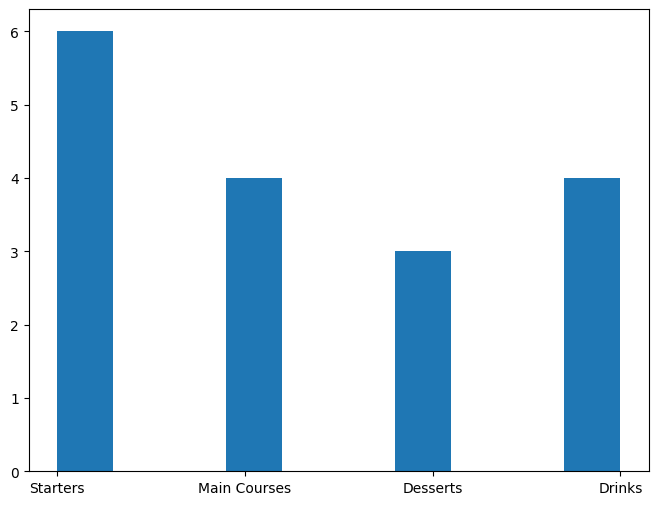

In [60]:
# I use matplotlibe library to draw a bar chart from the data
plt.figure(figsize=(8,6))
plt.hist(data.type)
plt.show()

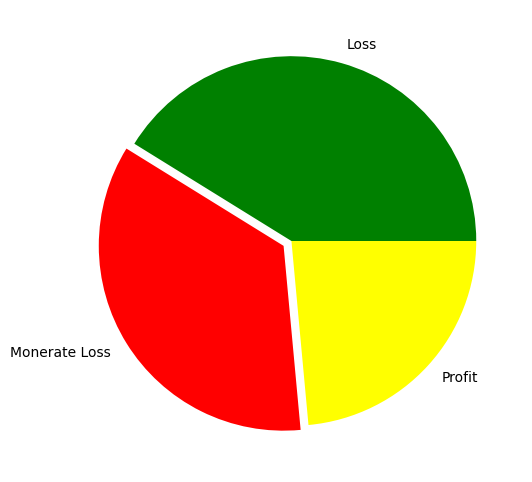

In [61]:
plt.figure(figsize=(8,6))
plt.pie(x=data.profit_status.value_counts(),labels=data.profit_status.unique(),explode=[0,.05,0],colors=['green','red','yellow'])
plt.show()

### Pooling

In [64]:
try:
    pool = MySQLConnectionPool(pool_name="little_lemon_pool",pool_size=5, host="localhost",\
                               user="", password="",database="little_lemon")
    print("Connection successfull")
except Exception as e:
    print(f"Error is occured: {e}")
    

Connection successfull


In [67]:
print("The following users want o connect to the database\n")
users = ["simean","sebgo","sana","ouedraogo","sawadogo"]
for user in users:
    print(user)

The following users want o connect to the database

simean
sebgo
sana
ouedraogo
sawadogo


In [70]:
print("User want o query data from bookings")
query = """SELECT * FROM bookings WHERE bookingId = "%(booking_id)s" """

User want o query data from bookings


In [69]:
for i in range( pool.pool_size ):
    conn = pool.get_connection()
    if conn.is_connected():
        cursor = conn.cursor()
        print("The connection id for {} is requesting info on book {}".format(users[i],conn.connection_id,i+1))
        cursor.execute(query,{"booking_id":i+1})
        print(cursor.fetchall())
    else:
        print("No live connection made")

    conn.close()

The connection id for simean is requesting info on book 19
[(1, 12, 'Anna', 'Iversen', datetime.timedelta(seconds=68400), 1)]
The connection id for sebgo is requesting info on book 20
[(2, 12, 'Joakim', 'Iversen', datetime.timedelta(seconds=68400), 1)]
The connection id for sana is requesting info on book 21
[(3, 19, 'Vanessa', 'McCarthy', datetime.timedelta(seconds=54000), 3)]
The connection id for ouedraogo is requesting info on book 22
[]
The connection id for sawadogo is requesting info on book 23
[(5, 5, 'Hiroki', 'Yamane', datetime.timedelta(seconds=66600), 2)]
